# Intro

In this notebook, I read all the result files from each competitor method to create a summary figure.
The metrics I use are RMSE and Pearson correlation on the expression and log2FC.
The experiments I perform comparisons on are: None stimulated, All stimulated, cell-type specific stimulation

In [1]:
# general imports
import warnings
import numpy as np
from scipy.stats import spearmanr, pearsonr, ttest_ind, wilcoxon


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# programming stuff
import time
import os
import pickle
from pathlib import Path

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from sc_preprocessing import sc_preprocess
from method_comparison import validation_plotting as vp


In [2]:
## parameters
aug_data_path = f"{os.getcwd()}/../data/single_cell_data/augmented_kang_data/"
res_data_path = f"{os.getcwd()}/../results/single_cell_data/buddiM2_kang/"
cibersort_genes_path = (f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/" +
                        "CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_phenoclasses" +
                        ".CIBERSORTx_Job17_kang_1_cybersort_sig_inferred_refsample.bm.K999.txt")

# cibersort results
cibersort_file_path = f"{os.getcwd()}/../results/single_cell_data/cibersort_kang/CIBERSORTx_Job18_Results.csv"

# bp results
bp_res_path = f"{os.getcwd()}/../results/single_cell_data/bp_kang/"

# DiffExp results
de_res_path = f"{os.getcwd()}/../data/single_cell_data/kang_rybakov/kang_DE_paper.tsv"

num_genes = 7000


In [3]:
exp_type = "mono-kang"

buddi_file = os.path.join(res_data_path, f"{exp_type}_pearson_matr.csv")
pca_file = os.path.join(res_data_path, f"{exp_type}_pearson_PCA.csv")
cvae_file = os.path.join(res_data_path, f"{exp_type}_pearson_CVAE.csv")
vae_file = os.path.join(res_data_path, f"{exp_type}_pearson_VAE.csv")

buddi_df = pd.read_csv(buddi_file, sep=",")
pca_df = pd.read_csv(pca_file, sep=",")
cvae_df = pd.read_csv(cvae_file, sep=",")
vae_df = pd.read_csv(vae_file, sep=",")


# format the corr
buddi_df["method"] = ["BuDDI"]*buddi_df.shape[0]
pca_df["method"] = ["PCA"]*pca_df.shape[0]
cvae_df["method"] = ["CVAE"]*cvae_df.shape[0]
vae_df["method"] = ["VAE"]*vae_df.shape[0]

plot_df = pd.concat([buddi_df, pca_df, cvae_df, vae_df])




In [4]:
plot_df

,sample_id,cell_type,bulk_type,expr_r2_stim,expr_r2_ctrl,log2FC_r2,log2FC_r2_bottom,log2FC_r2_mid,log2FC_r2_top,log2FC_rmse,method,expr_r2
0,101,B,cell_type_specific,0.810525,0.820137,0.804505,0.637042,0.862543,0.886277,1.040085,BuDDI,NaN
1,101,CD14_Mono,cell_type_specific,0.913934,0.912847,0.690536,0.442146,0.741937,0.881420,2.069237,BuDDI,NaN
2,101,CD16_Mono,cell_type_specific,0.859121,0.868000,0.812082,0.621307,0.877917,0.900290,1.011173,BuDDI,NaN
3,101,CD4_Mem_T,cell_type_specific,0.826615,0.836468,0.816392,0.615803,0.875702,0.910078,1.021903,BuDDI,NaN
4,101,CD4_Naive_T,cell_type_specific,0.836206,0.842072,0.805866,0.606386,0.888198,0.881907,1.030892,BuDDI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55,1488,CD8_T,cell_type_specific,NaN,NaN,0.340957,0.428219,0.253150,0.319346,2.047539,VAE,0.477784
56,1488,DC,cell_type_specific,NaN,NaN,0.280270,0.346763,0.193431,0.344205,2.075102,VAE,0.431583
57,1488,Mk,cell_type_specific,NaN,NaN,0.320139,0.392387,0.249925,0.353733,2.094710,VAE,0.439071
58,1488,NK,cell_type_specific,NaN,NaN,0.336676,0.430850,0.245328,0.361407,2.075201,VAE,0.418574


In [5]:
s = plot_df.groupby(["method"]).agg({'expr_r2': ['median', 'std'],
                                 'log2FC_r2': ['median', 'std'],
                                 'log2FC_rmse': ['median', 'std']})

s = s.style.format('{:.3f}')
s


In [6]:
a2 = plot_df.groupby(["method"])["expr_r2", "log2FC_r2", "log2FC_rmse"].std()


<ipython-input-6-2eec0688e9f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a2 = plot_df.groupby(["method"])["expr_r2", "log2FC_r2", "log2FC_rmse"].std()


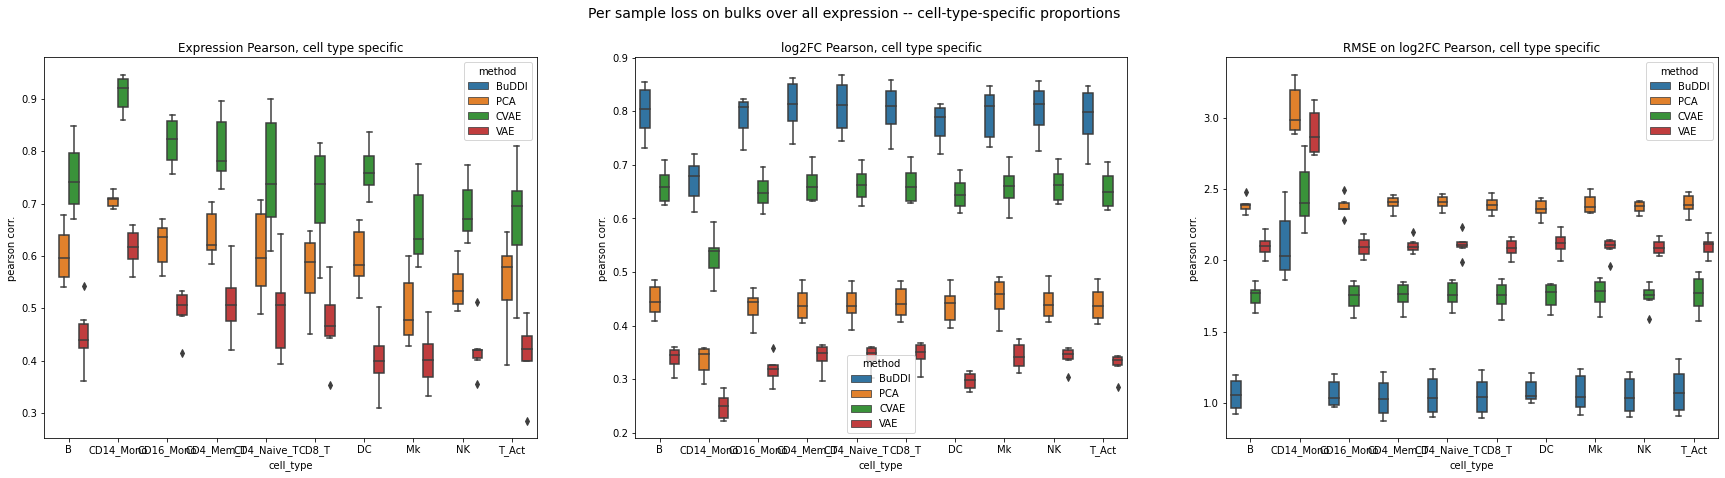

In [8]:

# plot
fig, axs = plt.subplots(1, 3, figsize=(30,7))

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="expr_r2",
            hue="method", ax= axs[0])
axs[0].set_title("Expression Pearson, cell type specific")
axs[0].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2",
            hue="method", ax= axs[1])
axs[1].set_title("log2FC Pearson, cell type specific")
axs[1].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_rmse",
            hue="method", ax= axs[2])
axs[2].set_title("RMSE on log2FC Pearson, cell type specific")
axs[2].set(ylabel="pearson corr.")


fig.suptitle("Per sample loss on bulks over all expression -- cell-type-specific proportions", fontsize=14)

fig.show()



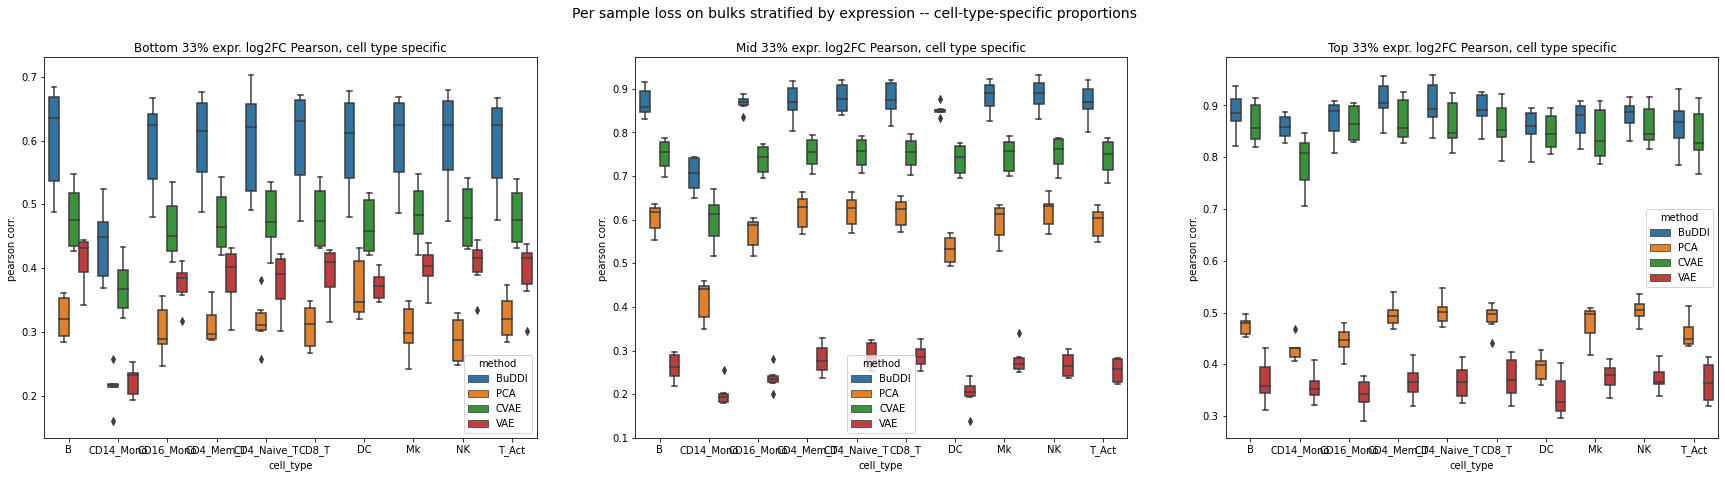

In [9]:

fig, axs = plt.subplots(1, 3, figsize=(30,7))

sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2_bottom",
            hue="method", ax= axs[0])
axs[0].set_title("Bottom 33% expr. log2FC Pearson, cell type specific")
axs[0].set(ylabel="pearson corr.")


sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2_mid",
            hue="method", ax= axs[1])
axs[1].set_title("Mid 33% expr. log2FC Pearson, cell type specific")
axs[1].set(ylabel="pearson corr.")



sns.boxplot(data=plot_df[plot_df["bulk_type"] == "cell_type_specific"], 
            x="cell_type", y="log2FC_r2_top",
            hue="method", ax= axs[2])
axs[2].set_title("Top 33% expr. log2FC Pearson, cell type specific")
axs[2].set(ylabel="pearson corr.")



fig.suptitle("Per sample loss on bulks stratified by expression -- cell-type-specific proportions", fontsize=14)

fig.show()


